In [1]:
#!pip install opencv-python

In [2]:
import cv2

In [3]:
input=cv2.imread("input.jpg")
cv2.imshow("Computer Vision",input)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
input

array([[[12, 18, 31],
        [12, 18, 31],
        [11, 17, 30],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       ...,

       [[ 4,  7, 12],
        [ 4,  7, 12],
        [ 3,  7, 12],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 3,  6, 11],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 2,  5, 10],
        ...,
        [18, 23, 38],
        [18, 23, 38],
        [19, 24, 39]]], dtype=uint8)

In [5]:
input.shape

(830, 1245, 3)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

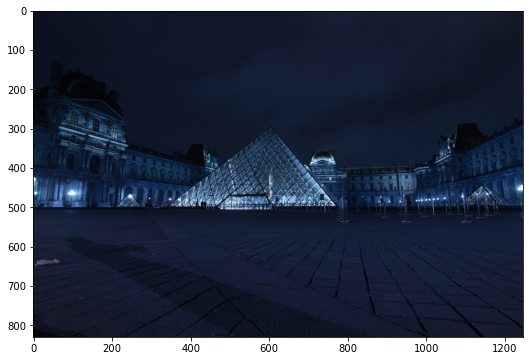

In [8]:
plt.figure(figsize=(10,6))
plt.imshow(input)

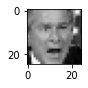

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(data.lfw_subset()[0,:,:],cmap='gray') #skimage içindeki hazır resimleri gösterdik

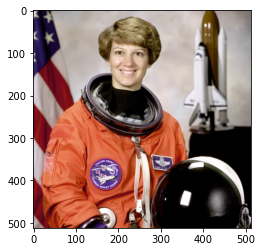

In [10]:
plt.imshow(data.astronaut())

In [11]:
data.astronaut().shape

(512, 512, 3)

In [12]:
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

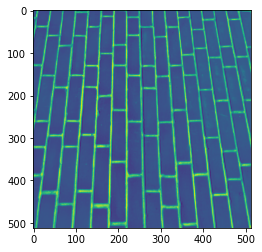

In [16]:
plt.imshow(data.brick())

In [17]:
import cv2
image=cv2.imread("input.jpg")
cv2.imshow("Original",image)
cv2.waitKey()
sb=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("Siyah Beyaz",sb)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
import cv2
image=cv2.imread("input.jpg",0)
cv2.imshow("SB",image)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
import cv2
image=cv2.imread("input.jpg")
B,G,R=image[0,0]
print(B,G,R)

12 18 31


In [20]:
B,G,R=cv2.split(image)
cv2.imshow("red",R)
cv2.imshow("Green",G)
cv2.imshow("Blue",B)
cv2.waitKey()
cv2.destroyAllWindows()

# Edge Detection

In [23]:
import cv2
import numpy as np
image = cv2.imread('input.jpg',0)

height,width = image.shape[:2]

sobel_x = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 5)

cv2.imshow('Rotated Image',image)
cv2.waitKey(0)
cv2.imshow('Sobel X',sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y',sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('sobel_OR',sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.waitKey(0)

canny = cv2.Canny(image,50,120)
cv2.imshow('Canny',canny)
cv2.waitKey(0)
 

cv2.destroyAllWindows()

In [24]:
import cv2    #bu bilgisayarda kamera yok diğer bilgisayarda dene
import numpy as np

def sketch(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    img_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0)
    canny_edges = cv2.Canny(img_gray_blur,10,70)
    ret,mask = cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY_INV)
    return mask

cap = cv2.VideoCapture(0) # 0 yazınca ön kamerayı alıyor

while True:
    ret,frame = cap.read()
    cv2.imshow('Our live Sketcher',sketch(frame))
    if cv2.waitKey(1) == 13: #programdan çıkmak için enter a basıyoruz
        break

cap.release()
cv2.destroyAllWindows()
print('done')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    cv2.imshow('Our live Sketcher',frame)
    if cv2.waitKey(1) == 13:  #13 enter tuşu
        break

cap.release()

cv2.destroyAllWindows()
print('done')

In [ ]:
#where is waldo

In [25]:
import cv2
import numpy as np

image=cv2.imread("WaldoBeach.jpg")

cv2.imshow("Where is Waldo", image)
cv2.waitKey(0)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread("Waldo.jpg", 0)
cv2.imshow("Waldo", template)
cv2.waitKey(0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

top_left=maxLoc
bottom_right = (top_left[0] + 50, top_left[1]+50)
cv2.rectangle (image, top_left, bottom_right, (0,0,255),5)

cv2.imshow("Where is Waldo", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
import cv2
cap=cv2.VideoCapture("airplanes.mp4")
while True:
    ret,frame=cap.read()
    if ret:
        cv2.imshow("Demo",frame) #ret bir sonraki kareye bakıyor
    else:
        break
    key=cv2.waitKey(10) #10 q harfi quit
    if key==ord("q"):
        break
cv2.destroyAllWindows()

In [27]:
import cv2
cap=cv2.VideoCapture("cars.mp4")
while True:
    ret,frame=cap.read()
    if ret:
        cv2.imshow("Demo",frame) #ret bir sonraki kareye bakıyor
    else:
        break
    key=cv2.waitKey(10) #10 q harfi quit
    if key==ord("q"):
        break
cv2.destroyAllWindows()

In [35]:
import cv2
cap=cv2.VideoCapture("cars.mp4")
while True:
    ret,frame=cap.read()
    if ret:
        cv2.imshow("Demo",frame) #ret bir sonraki kareye bakıyor
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow("SB",gray)
    else:
        break
    key=cv2.waitKey(10) #10 q harfi quit
    if key==ord("q"):
        break
cv2.destroyAllWindows()

# hareket algılama

In [36]:
import cv2  #diğer pc de dene bunda kamera yok
import numpy as np

cap=cv2.VideoCapture(0) #kameradaki hareketi algıladı
#cap=cv2.VideoCapture("cars.mp4")
#cap=cv2.VideoCapture("airplanes.mp4")

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)    
    frame1_blur = cv2.GaussianBlur(frame1_gray, (21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray, (21,21),0)        
    
    diff=cv2.absdiff(frame1_blur, frame2_blur)  #1. kare ile 2. kareyi karşılaştır farkı ver
    
    cv2.imshow("Motion", diff)
    frame1 = frame2
    
    ret,frame2=cap.read()
    
    if not ret:
        cap.release()
        break
        
    key=cv2.waitKey(10)
    if key==ord("q"):
        cap.release()
        break
        
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [38]:
import cv2
import numpy as np

cap=cv2.VideoCapture("airplanes.mp4")

ret1, frame1 = cap.read()
ret2, frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)    
    frame1_blur = cv2.GaussianBlur(frame1_gray, (21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray, (21,21),0)        
    
    diff=cv2.absdiff(frame1_blur, frame2_blur)
    
    thresh=cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)[1]
    final=cv2.dilate(thresh, None, iterations=2)
    
    masked=cv2.bitwise_and(frame1, frame1, mask=thresh)
    
    white_pixels = np.sum(thresh)/255
    rows, cols=thresh.shape
    total=rows*cols
    
    if white_pixels > 0.01 * total:
        font=cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1, "Movement Detected - Hareket Algilandi", (10,50), font, 1, (0,0,255), 2, cv2.LINE_AA)
    
    cv2.imshow("Motion", frame1)
    frame1 = frame2    
    ret,frame2=cap.read()
    
    if not ret:
        break
        
    key=cv2.waitKey(10)
    if key==ord("q"):
        break
        
cv2.destroyAllWindows()

# kaç tane sunflowers var

In [1]:
# Standard imports
import cv2
import numpy as np;
 
# Read image
image = cv2.imread("Sunflowers.jpg")
 
# Set up the detector with default par ameters.
detector =cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(image) 
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)
 
print ("# of Sunflowers: "+str(len(blobs)))

# Show keypoints
cv2.imshow("Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()

# of Sunflowers: 990


# Yüz tanıma

In [2]:
import numpy as np
import cv2

# We point OpenCV's CascadeClassifier function to where our 
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('myself.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    cv2.imshow('Face Detection', image)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()


<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\T\AppData\Local\Temp\ipykernel_8488\537462802.py:17: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [40]:
!pip install opencv-contrib-python --user

In [ ]:
# 100 tane fotoğraf çekiyor resim topluyor

In [41]:
import cv2 #kamera olan pcde çalıştır
import numpy as np
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face
cap = cv2.VideoCapture(0)
count = 0
while True:
    ret,frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame),(200,200))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        file_name_path = './faces/user/' + str(count) +'.jpg'
        cv2.imwrite(file_name_path,face)
        cv2.putText(face,str(count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow("Face Cropper",face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count ==100:
        break
cap.release()
cv2.destroyAllWindows()
print('Collecting Samples Complete')

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\T\AppData\Local\Temp\ipykernel_3232\1189579538.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\T\AppData\Local\Temp\ipykernel_3232\1189579538.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\T\AppData\Local\Temp\ipykernel_3232\1189579538.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# modeli eğitiyor

In [42]:
import cv2 #kamera olan pcde çalıştır
import numpy as np
from os import listdir
from os.path import isfile,join
data_path = './faces/user/'
onlyfiles =[f for f in listdir(data_path) if isfile(join(data_path,f))]
Training_Data,Labels = [],[]
for i,files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images,dtype = np.uint8))
    Labels.append(i)
Labels = np.asarray(Labels,dtype = np.int32)
model = cv2.face.LBPHFaceRecognizer_create()
model.train(np.asarray(Training_Data),np.asarray(Labels))
print("Model Trained Succesfully")

AttributeError: module 'cv2' has no attribute 'face'

In [ ]:
#yeni gördüğü resimden kim olduğumuzu tanıma

In [43]:
import cv2 #kamera olan pcde çalıştır
import numpy as np
face_classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
def face_extractor(img, size = 0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return img,[]
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi,(200,200))
    return img,roi
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    image,face = face_extractor(frame)
    try:
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        if results[1]<500:
            confidence = int(100 * (1-(results[1])/400))
            display_string = str(confidence) + '% Confident it is Hande'
        cv2.putText(image,display_string,(100,120),cv2.FONT_HERSHEY_COMPLEX,1,(255,120,150),2)
        if confidence > 75:
            cv2.putText(image,"Unlocked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.imshow("Face Recognition",image)
        else:
            cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            cv2.imshow("Face Recognition",image)
    except:
        cv2.putText(image,"No Face Found" ,(220,120),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.imshow("Face Recognition",image)
    if cv2.waitKey(1) == 13:
        cap.release()
        break
cap.release()
cv2.destroyAllWindows()

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\T\AppData\Local\Temp\ipykernel_3232\1719394317.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\T\AppData\Local\Temp\ipykernel_3232\1719394317.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():
C:\Users\T\AppData\Local\Temp\ipykernel_3232\1719394317.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
